In [ ]:
! git clone https://github.com/mabhay3420/Deep-Into-CNN.git

Cloning into 'Deep-Into-CNN'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 73 (delta 4), reused 72 (delta 3), pack-reused 0
Unpacking objects: 100% (73/73), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('Deep-Into-CNN/W2-3/NeuralNetIntro/Student-admissions/student_data.csv')

In [ ]:
train_df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


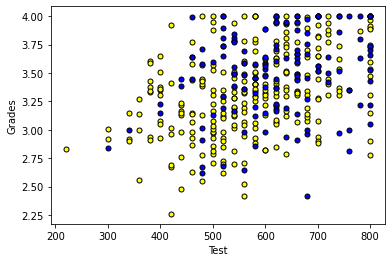

In [ ]:
def plot_points(data):
  X = np.array(data[["gre","gpa"]])
  y = np.array(data["admit"])
  admitted = X[np.argwhere(y==1)]
  rejected = X[np.argwhere(y == 0)]
  plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected], s = 25,color = 'yellow',edgecolor = 'k')
  plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted],s = 25, color = 'blue',edgecolor = 'k')
  plt.xlabel('Test')
  plt.ylabel('Grades')
plot_points(train_df)
plt.show()

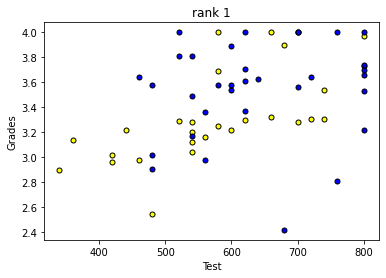

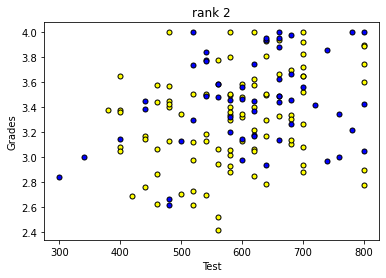

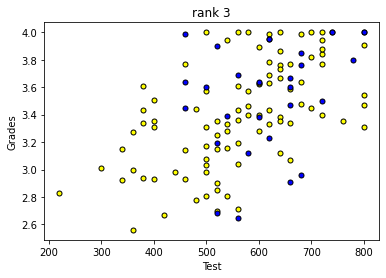

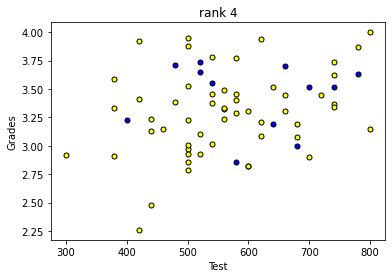

In [ ]:
df_rank1 = train_df[train_df['rank'] == 1]
df_rank2 = train_df[train_df['rank'] == 2]
df_rank3 = train_df[train_df['rank'] == 3]
df_rank4 = train_df[train_df['rank'] == 4]
plot_points(df_rank1)
plt.title('rank 1')
plt.show()
plot_points(df_rank2)
plt.title('rank 2')
plt.show()
plot_points(df_rank3)
plt.title('rank 3')
plt.show()
plot_points(df_rank4)
plt.title('rank 4')
plt.show()


In [14]:
#get_dummies automatically dropped my previous rank column,so I have commented that part of code.
one_hot_data = pd.get_dummies(train_df,prefix = 'rank',columns = ['rank'])
#one_hot_data = one_hot_data.drop(['rank'],axis = 1)
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


In [15]:
preprocessed_data = one_hot_data[:]
preprocessed_data['gre']/= 800;
preprocessed_data['gpa']/=4;
preprocessed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [16]:
sample = np.random.choice(preprocessed_data.index,size = int(len(preprocessed_data)*0.9),replace = False)
train_data,test_data = preprocessed_data.iloc[sample],preprocessed_data.drop(sample)
print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
389      0  0.800  0.8775       0       1       0       0
107      0  0.600  0.7825       0       1       0       0
364      1  0.700  0.8400       1       0       0       0
246      0  0.850  0.8350       0       1       0       0
178      0  0.775  0.8325       0       0       1       0
110      0  0.850  0.7700       0       0       0       1
280      0  0.825  0.9850       0       1       0       0
241      1  0.650  0.9525       1       0       0       0
43       0  0.625  0.8275       0       0       1       0
182      0  0.875  1.0000       0       1       0       0
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
16       0  0.975  0.9675       0       0       0       1
22       0  0.750  0.7050       0       0       0       1
45       1  0.575  0.8625       0       0       1       0
50       0  0.800  0.9650       0       0       1       0
61    

In [17]:
features = train_data.drop(['admit'],axis = 1)
target = train_data['admit']
features_test = test_data.drop(['admit'],axis = 1)
target_test = test_data['admit']
print(features[:10])
print(target[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
389  0.800  0.8775       0       1       0       0
107  0.600  0.7825       0       1       0       0
364  0.700  0.8400       1       0       0       0
246  0.850  0.8350       0       1       0       0
178  0.775  0.8325       0       0       1       0
110  0.850  0.7700       0       0       0       1
280  0.825  0.9850       0       1       0       0
241  0.650  0.9525       1       0       0       0
43   0.625  0.8275       0       0       1       0
182  0.875  1.0000       0       1       0       0
389    0
107    0
364    1
246    0
178    0
110    0
280    0
241    1
43     0
182    0
Name: admit, dtype: int64


In [18]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))
def sigmoid_prime(x):
  return sigmoid(x)*(1 - sigmoid(x))
def error_formula(y,output):
  return -y*np.log(output) - (1-y)*np.log(1 - output)

In [30]:
def error_term_formula(x,y,output):
  return np.multiply(y - output,np.multiply(sigmoid_prime(x),x))

In [31]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.0001

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term

        # Update the weights here. The learning rate times the 
        # change in weights
        # don't have to divide by n_records since it is compensated by the learning rate
        weights += learnrate * del_w #/ n_records  

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean(error_formula(targets, out))
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, target, epochs, learnrate)

Epoch: 0
Train loss:  0.7504396905889651
Epoch: 100
Train loss:  0.6963502045546497
Epoch: 200
Train loss:  0.6654926861152062
Epoch: 300
Train loss:  0.6478276622954018
Epoch: 400
Train loss:  0.6375598090943055
Epoch: 500
Train loss:  0.6314451630522215
Epoch: 600
Train loss:  0.627680580596879
Epoch: 700
Train loss:  0.6252601482435362
Epoch: 800
Train loss:  0.623618395278867
Epoch: 900
Train loss:  0.6224347208692588
Finished training!


In [32]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == target_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.775
